In [110]:
import numpy as np
import math 
import queue
import os
import neat
import visualize
import random
import matplotlib.pyplot as plt

import GameManager
from GameManager import map_manager, Tile, Unit, Team

import Neat_AI
from Neat_AI import eval_genomes, run

import AI_modules
from AI_modules import no_ai, rand_ai, script_ai, neat_ai

In [8]:
local_dir = os.path.abspath('')
config_path = os.path.join(local_dir, 'config-feedforward')

In [64]:
dimensions = (8,8)
manager = map_manager(dimensions)

pos_pick = random.randint(0, 1)
pos_list = []
for i in range(4):
    pos_list.append((i+2, 0))
for i in range(4):
    pos_list.append((i+2, dimensions[1]-1))

manager.reset_map()
units0 = []
units1 = []
if pos_pick == 0:
    for i in range(4):
        units0.append(manager.place_unit(pos_list[i], 0))
    for i in range(4, 8):
        units1.append(manager.place_unit(pos_list[i], 1))
else:
    for i in range(4):
        units1.append(manager.place_unit(pos_list[i], 1))
    for i in range(4, 8):
        units0.append(manager.place_unit(pos_list[i], 0))
        
print(manager)

[ ][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]
[1][ ][ ][ ][ ][ ][ ][0]
[1][ ][ ][ ][ ][ ][ ][0]
[1][ ][ ][ ][ ][ ][ ][0]
[1][ ][ ][ ][ ][ ][ ][0]
[ ][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]



In [82]:
dimensions = (8,8)
manager = map_manager(dimensions)
#win_net1
#win_net2

manager.reset_map()
pos_pick = random.randint(0, 1)
pos_list = []
for i in range(4):
    pos_list.append((i+2, 0))
for i in range(4):
    pos_list.append((i+2, dimensions[1]-1))

manager.reset_map()
units0 = []
units1 = []
if pos_pick == 0:
    for i in range(4):
        units0.append(manager.place_unit(pos_list[i], 0))
    for i in range(4, 8):
        units1.append(manager.place_unit(pos_list[i], 1))
else:
    for i in range(4):
        units1.append(manager.place_unit(pos_list[i], 1))
    for i in range(4, 8):
        units0.append(manager.place_unit(pos_list[i], 0))

print(manager.Teams[0].units)   
print(manager.Teams[1].units)        

my_units = []
op_units = []
net = None
#print("GENOME EVALUATION: ")
while (manager.game_result() == -1 and manager.turn_count < 8): #Turn Count limit may have to be modified
    
    for unit in manager.Teams[manager.curr_team].units:
        win_move = (0, 0)
        if manager.curr_team == 0:
            win_move = neat_ai(manager, unit, win_net)
        elif manager.curr_team == 1:
            win_move = script_ai(manager, unit)
        manager.move_unit(unit, win_move)
    print(manager)

    #Next Turn
    manager.Turn()

print(manager.game_result())

[<GameManager.Unit object at 0x000002669793DB50>, <GameManager.Unit object at 0x000002669793D5E0>, <GameManager.Unit object at 0x0000026696221220>, <GameManager.Unit object at 0x0000026696221E80>]
[<GameManager.Unit object at 0x0000026696221D00>, <GameManager.Unit object at 0x00000266962212B0>, <GameManager.Unit object at 0x0000026696221B20>, <GameManager.Unit object at 0x0000026696221BE0>]
[0][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][1]
[0][ ][ ][ ][ ][ ][ ][1]
[ ][ ][ ][ ][ ][ ][ ][1]
[ ][ ][ ][ ][ ][ ][ ][1]
[0][ ][ ][ ][ ][ ][ ][ ]
[0][ ][ ][ ][ ][ ][ ][ ]

[0][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]
[0][ ][ ][1][1][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][1][ ]
[ ][ ][ ][1][ ][ ][ ][ ]
[0][ ][ ][ ][ ][ ][ ][ ]
[0][ ][ ][ ][ ][ ][ ][ ]

[ ][ ][ ][ ][0][ ][ ][ ]
[ ][ ][0][ ][ ][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]
[0][ ][ ][1][1][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][1][ ]
[ ][ ][ ][1][ ][ ][ ][ ]
[ ][ ][ ][ ][0][ ][ ][ ]
[ ][ ][ ][ ][ ][ ][ ][ ]

[ ]

In [123]:
from importlib import reload
reload(GameManager)
reload(AI_modules)
reload(Neat_AI)


from GameManager import map_manager, Tile, Unit, Team
from Neat_AI import eval_genomes, run
from AI_modules import no_ai, rand_ai, script_ai, neat_ai


 ****** Running generation 0 ****** 

Population's average fitness: 0.00000 stdev: 0.00000
Best fitness: 0.00000 - size: (2, 45) - species 1 - id 1
This generation's best genome's winrate vs. script: 0.0
Average adjusted fitness: 0.000
Mean genetic distance 2.175, standard deviation 0.665
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      0.0    0.000     0
Total extinctions: 0
Generation time: 9.614 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.00000 stdev: 0.00000
Best fitness: 0.00000 - size: (2, 45) - species 1 - id 1
This generation's best genome's winrate vs. script: 0.0
Average adjusted fitness: 0.000
Mean genetic distance 1.725, standard deviation 0.659
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      0.0    0.000     1
Total extinctions: 0
Generation time: 

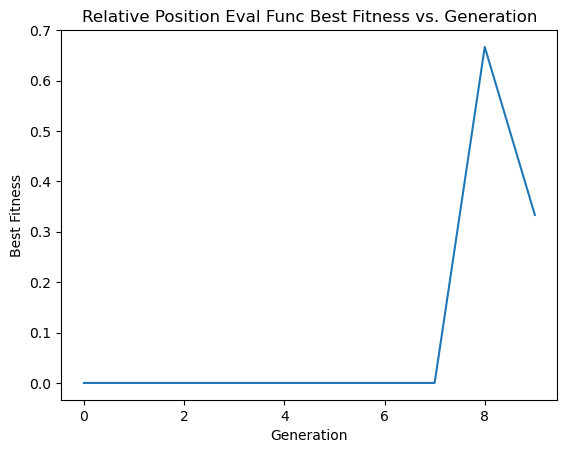

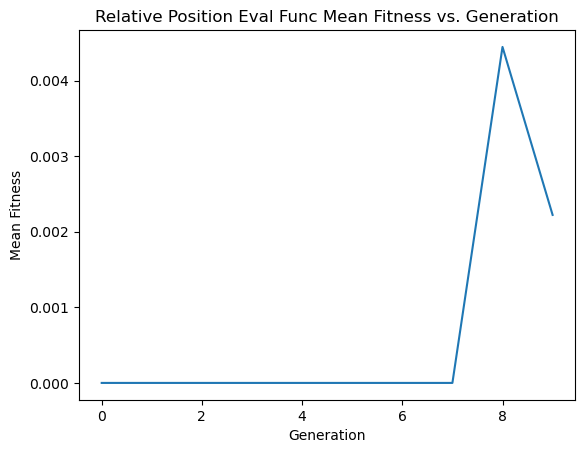

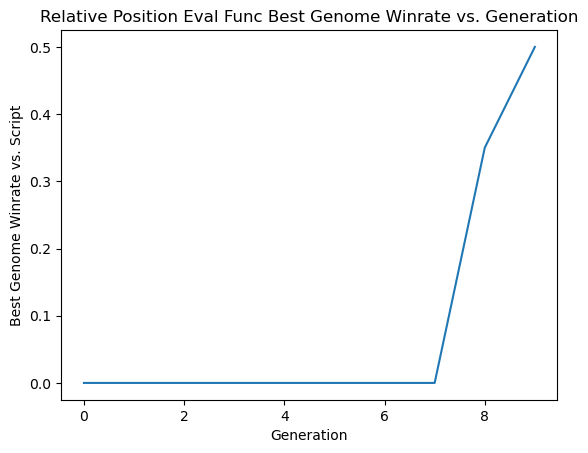

In [124]:
win_net, stats = run(config_path)

In [16]:
win_net1 = saved_net

In [16]:
#win_net2 = saved_net